In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [ ]:
from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import nltk
nltk.download('stopwords')
from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
from nltk.tokenize import word_tokenize
import gensim
import string

In [ ]:
import warnings
warnings.simplefilter('ignore')


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving combined.csv to combined.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = "/content/drive/MyDrive/data/combined.csv"
df_bonus = pd.read_csv(path,lineterminator='\n')

In [ ]:
df_bonus.shape


(61356, 3)

In [ ]:
print('There are {} rows and {} columns in combined dataset'.format(
    df_bonus.shape[0], df_bonus.shape[1]))


There are 61356 rows and 3 columns in combined dataset


In [ ]:
df_bonus.head()

,Datetime,Tweet Id,Text
0,2021-11-09 11:47:26+00:00,1458038518031081474,"#twosuns and #immaru' today 9november2021, 4pm..."
1,2021-11-09 11:39:03+00:00,1458036406836596737,@GHMCOnline @HMWSSBOnline @KTRTRS What is th...
2,2021-11-09 03:29:58+00:00,1457913327544414212,"Also, Vizag already faced Hud Hud. Amaravati i..."
3,2021-11-08 18:40:43+00:00,1457780135776555010,@Xtraordinary_11 @Mayankkk98 @TrivikramanN @Th...
4,2021-11-08 14:55:10+00:00,1457723377158819844,"""looks like the rains / floods are going to be..."


In [ ]:
df_bonus.columns = ['date','id','content']

In [ ]:
df_bonus.head()

,date,id,content
0,2021-11-09 11:47:26+00:00,1458038518031081474,"#twosuns and #immaru' today 9november2021, 4pm..."
1,2021-11-09 11:39:03+00:00,1458036406836596737,@GHMCOnline @HMWSSBOnline @KTRTRS What is th...
2,2021-11-09 03:29:58+00:00,1457913327544414212,"Also, Vizag already faced Hud Hud. Amaravati i..."
3,2021-11-08 18:40:43+00:00,1457780135776555010,@Xtraordinary_11 @Mayankkk98 @TrivikramanN @Th...
4,2021-11-08 14:55:10+00:00,1457723377158819844,"""looks like the rains / floods are going to be..."


In [ ]:
tweets = pd.DataFrame(df_bonus['content'])

In [ ]:
def length(text):
    return len(text)

df_bonus['length']=df_bonus['content'].apply(length)

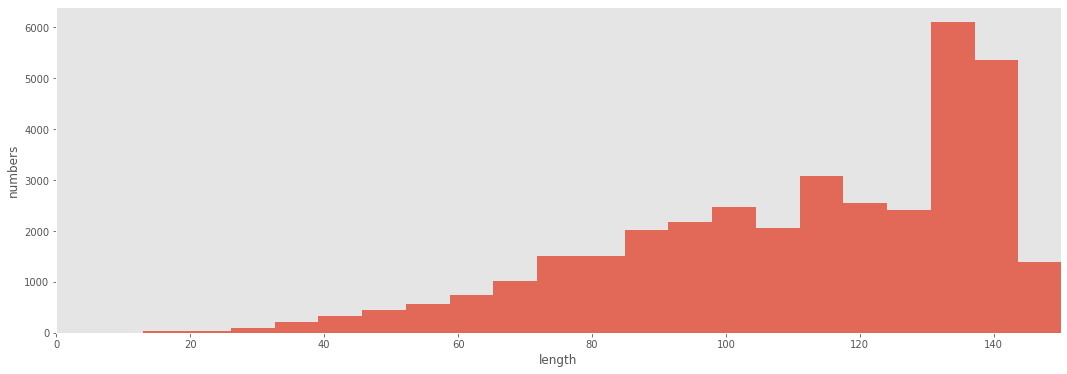

In [ ]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(df_bonus['length'],alpha=0.8, bins=bins)
plt.xlabel('length')
plt.ylabel('numbers')
plt.xlim(0, 150)
plt.grid()
plt.show()

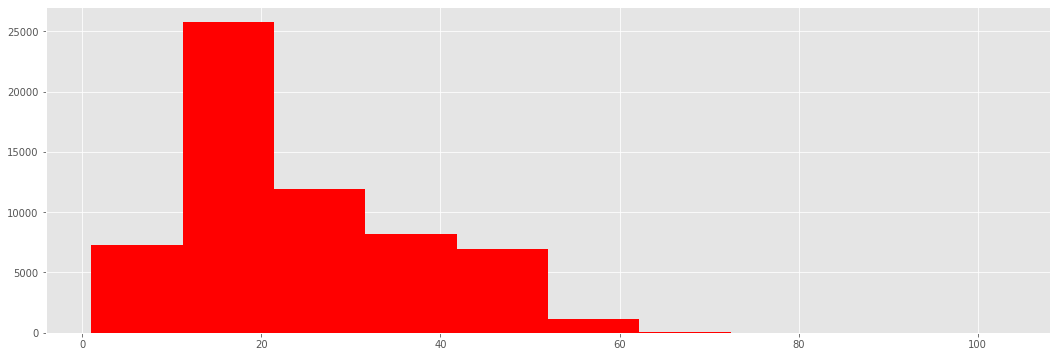

In [ ]:
tweett_len = df_bonus['content'].str.split().map(lambda x:len(x))
plt.hist(tweett_len,color='red')
plt.show()

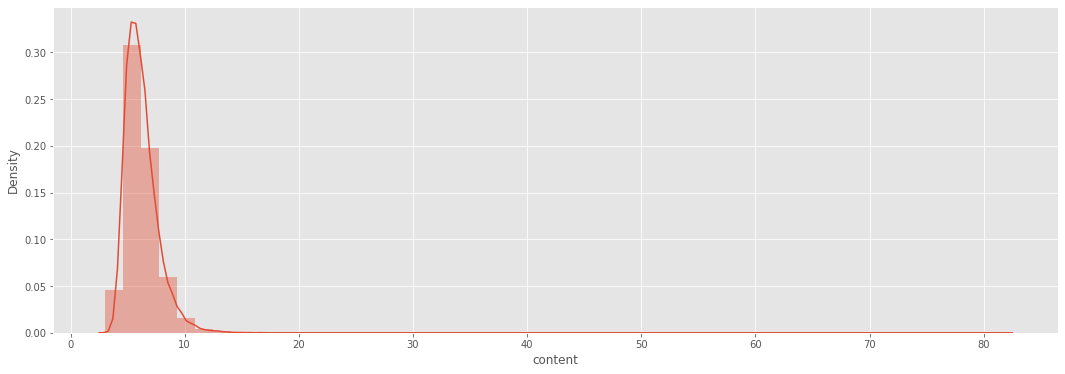

In [ ]:
word=df_bonus['content'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x:np.mean(x)))

In [ ]:
def create_corpus(df_bonus):
    corpus = []

    for x in df_bonus['content'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [ ]:
corpus = create_corpus(df_bonus)

dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1

top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]


In [ ]:
np.array(stop)

array({"hadn't", "you'd", 'how', "aren't", 'her', 'mustn', 'doing', 'or', 'up', 'ours', 'any', 'his', "won't", 'than', 'out', 'them', 'if', "wasn't", 'no', 't', 'being', 'she', 'have', "shouldn't", 'such', 'from', 'not', 'between', 'who', 'below', "don't", 'during', 'has', 'd', 'before', 'yourself', 'now', "should've", 'am', 'to', "haven't", 'of', 'are', 'only', 'own', 'other', 'doesn', 'further', 'themselves', 'having', 'under', 'its', 'should', 'nor', 'about', 've', 'just', 'yours', 'off', 's', 'didn', "wouldn't", 'at', 'here', 'the', 'so', 'because', 'myself', "that'll", "didn't", 'does', 'shouldn', 'an', 'very', 'itself', 'which', 'don', "shan't", 'there', 'was', 'couldn', 'both', 'for', 'hers', 'it', 'hadn', 'all', 'those', 'm', 'what', 'ourselves', 'through', "you're", 'where', 'over', 'hasn', 'when', 'same', "isn't", 'been', 'they', 'these', 'but', "it's", 'a', "doesn't", 'theirs', 'herself', 'as', 'wasn', "you'll", "needn't", 'whom', 'why', 'isn', 'him', 'mightn', 'until', 'had

<BarContainer object of 10 artists>

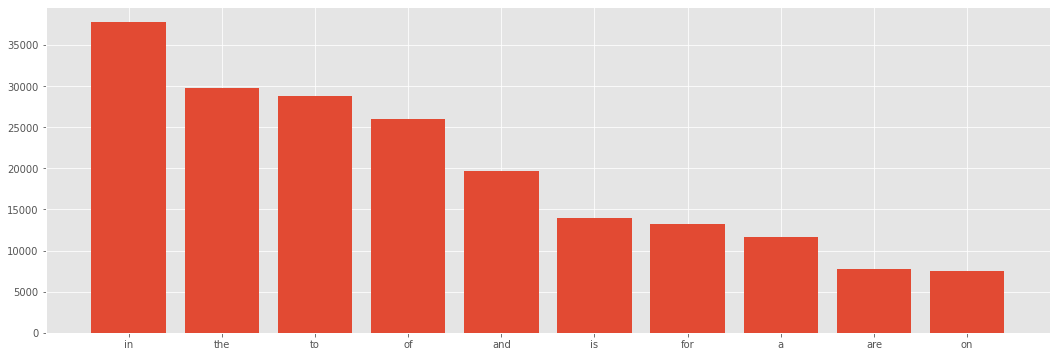

In [ ]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
x, y = zip(*top)
plt.bar(x, y)

<BarContainer object of 31 artists>

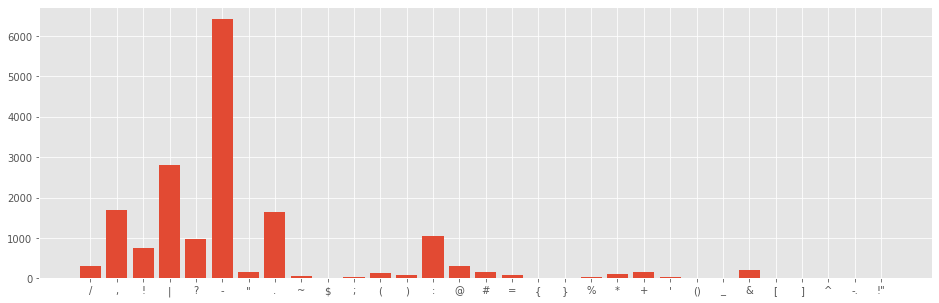

In [ ]:
plt.figure(figsize=(16, 5))
corpus = create_corpus(df_bonus)

dic = defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i] += 1

x, y = zip(*dic.items())
plt.bar(x, y)

In [ ]:
plt.figure(figsize=(16, 5))
counter = Counter(corpus)
most = counter.most_common()
x = []
y = []
for word, count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)


<Figure size 1152x360 with 0 Axes>

In [1]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

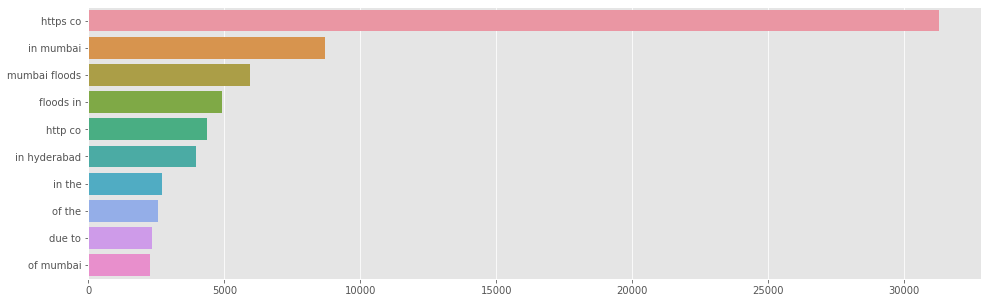

In [ ]:
plt.figure(figsize=(16, 5))
top_tweet_bigrams = get_top_tweet_bigrams(df_bonus['content'])[:10]
x, y = map(list, zip(*top_tweet_bigrams))
sns.barplot(x=y, y=x)

In [ ]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
df_content = tweet_df[tweet_df['ADR_label']==1]
df_NADR = tweet_df[tweet_df['ADR_label']==0]
tweet_All = " ".join(review for review in df.Tweet)
tweet_ADR = " ".join(review for review in df_ADR.Tweet)
tweet_NADR = " ".join(review for review in df_NADR.Tweet)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_ADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_ADR)
wordcloud_NADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_NADR)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_ADR, interpolation='bilinear')
ax[1].set_title('Tweets under ADR Class',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_NADR, interpolation='bilinear')
ax[2].set_title('Tweets under None - ADR Class',fontsize=30)
ax[2].axis('off')